# Exploratory Data Analysis (EDA) - Task January 30

## Objective
Conduct a complete Exploratory Data Analysis on a selected database, including:
- Quantitative analysis
- Qualitative analysis
- Graphical analysis
- Business explanations

---

## Students
- Name: Manuela Caro Villada
- Name: Jeronimo Velasquez Escobar

## Data Sources Consulted
1. **Database 1**: [[Social Media In Students](https://www.kaggle.com/datasets/aminasalamt/social-media-dataset-2025)]
2. **Database 2**: [[Food Order](https://www.kaggle.com/datasets/bhanupratapbiswas/uber-data-analysis)]
3. **Database 3**: [[Buyer Profiles](https://www.kaggle.com/datasets/dhrubangtalukdar/e-commerce-shopper-behavior-amazonshopify-based)]

---
## Selected Database

### **Food Order Data Set**

The reason why this database was chosen over the others is because the other databases did not meet all the requirements needed for delivery. However, there is a special case from the "Buyer Profiles" dataset. Unlike the other datasets, this one met all our expectations, but upon further review, we realized it had synthetic data, which does not give us a real vision of what we would normally encounter.

---
## Variable Descriptions
- order_id: Unique order ID
- customer_id: ID of the customer who placed the order
- restaurant_name: Restaurant name
- cuisine_type: Type of cuisine ordered by the customer
- cost: Order cost
- day_of_the_week: Indicates whether the order was placed on a weekday or weekend (Weekday is Monday to Friday and weekend is Saturday and Sunday)
- rating: Rating given by the customer out of 5
- food_preparation_time: Time (in minutes) it takes the restaurant to prepare the food. Calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pickup confirmation
- delivery_time: Time (in minutes) it takes the delivery person to deliver the food package. Calculated by taking the difference between the timestamps of the delivery person's pickup confirmation and delivery information

## 1. Libraries Import

In [1]:
# Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")

Libraries imported successfully


## 2. Data Loading

In [2]:
# Load the selected database
df = pd.read_csv('food_order.csv')

print(f"Dataset Dimensions: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset Dimensions: (1898, 9)
Rows: 1898, Columns: 9


## 3. Initial Dataset Exploration

In [3]:
# First rows
print("First 5 rows of the dataset:")
print(df.head())
print("\n" + "="*80 + "\n")

First 5 rows of the dataset:
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  




In [4]:
# Dataset information
print("Dataset Information:")
print(df.info())
print("\n" + "="*80 + "\n")

Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   str    
 3   cuisine_type           1898 non-null   str    
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   str    
 6   rating                 1898 non-null   str    
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), str(4)
memory usage: 133.6 KB
None




In [5]:
# Data types
print("Data Types:")
print(df.dtypes)

Data Types:
order_id                   int64
customer_id                int64
restaurant_name              str
cuisine_type                 str
cost_of_the_order        float64
day_of_the_week              str
rating                       str
food_preparation_time      int64
delivery_time              int64
dtype: object


In [6]:
# Transform customer id to string type
df['customer_id'] = df['customer_id'].astype('string')
print(df.dtypes)

order_id                   int64
customer_id               string
restaurant_name              str
cuisine_type                 str
cost_of_the_order        float64
day_of_the_week              str
rating                       str
food_preparation_time      int64
delivery_time              int64
dtype: object


## 4. Quantitative Analysis

In [7]:
# Descriptive statistics
print("Descriptive Statistics:")
# Based on the descriptions of the variables provided, we select the following numerical columns
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
df_numerical = df[numerical_columns]
df_numerical['T_total'] = df_numerical['food_preparation_time'] + df_numerical['delivery_time']
df_numerical['rating'] = pd.to_numeric(df_numerical['rating'], errors='coerce')
print(df_numerical.describe())
print("\n" + "="*80 + "\n")

Descriptive Statistics:
       cost_of_the_order  food_preparation_time  delivery_time       rating  \
count        1898.000000            1898.000000    1898.000000  1162.000000   
mean           16.498851              27.371970      24.161749     4.344234   
std             7.483812               4.632481       4.972637     0.741478   
min             4.470000              20.000000      15.000000     3.000000   
25%            12.080000              23.000000      20.000000     4.000000   
50%            14.140000              27.000000      25.000000     5.000000   
75%            22.297500              31.000000      28.000000     5.000000   
max            35.410000              35.000000      33.000000     5.000000   

           T_total  
count  1898.000000  
mean     51.533720  
std       6.833603  
min      35.000000  
25%      47.000000  
50%      52.000000  
75%      56.000000  
max      68.000000  




In [8]:
# Missing values
print("Missing values per column:")
print(df_numerical.isnull().sum())
print(f"\nPercentage of missing values:\n{(df_numerical.isnull().sum() / len(df_numerical) * 100).round(2)}%")
print("\n" + "="*80 + "\n")

Missing values per column:
cost_of_the_order          0
food_preparation_time      0
delivery_time              0
rating                   736
T_total                    0
dtype: int64

Percentage of missing values:
cost_of_the_order         0.00
food_preparation_time     0.00
delivery_time             0.00
rating                   38.78
T_total                   0.00
dtype: float64%




In [9]:
# Distribution of numerical variables
print("Correlation between numerical variables:")
print(df_numerical.corr(numeric_only=True))

Correlation between numerical variables:
                       cost_of_the_order  food_preparation_time  \
cost_of_the_order               1.000000               0.041527   
food_preparation_time           0.041527               1.000000   
delivery_time                  -0.029949               0.011094   
rating                          0.033983              -0.006083   
T_total                         0.006358               0.685970   

                       delivery_time    rating   T_total  
cost_of_the_order          -0.029949  0.033983  0.006358  
food_preparation_time       0.011094 -0.006083  0.685970  
delivery_time               1.000000 -0.009804  0.735195  
rating                     -0.009804  1.000000 -0.011348  
T_total                     0.735195 -0.011348  1.000000  


In [10]:
df_na = df_numerical[df_numerical['rating'].isna()]
df_na[['cost_of_the_order','T_total']].corr(method='pearson')

,cost_of_the_order,T_total
cost_of_the_order,1.000000,0.065481
T_total,0.065481,1.000000


### Results found in the analysis of quantitative variables

- It was found that the average value of total purchases made is $16.4 USD with a standard deviation (std) of 7.4, which means that most purchases are within $9 USD and $23.8 USD.

- It was found that the average rating left by users is 4.344234, with more than 50% of ratings being 5 points and the lowest being 3. However, it should be noted that 40% of entered data does not have an established rating. For the previous analysis, null values were not taken into account.

- The average delivery time for each order is 51 minutes, calculated by considering the sum of times provided in the dataset. Additionally, we observe that the std of delivery time is 6.8, which tells us that most deliveries take between 57.8 minutes and 44.2 minutes.

- The average preparation time for an order based on the data is 27.3 minutes, with a std of 4.6, which tells us that most food is prepared in a range of 22.7 minutes to 33.3 minutes

- The average time in which orders are distributed after being prepared is 24.1 minutes with a std of 4.9 minutes, which tells us that most deliveries are in a range of between 29 minutes and 19.2 minutes.

## 5. Qualitative Analysis

In [11]:
# Analysis of categorical variables
print("Analysis of categorical variables:\n")
not_numerical_columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'customer_id']
df_categorical = df[not_numerical_columns]
for col in df_categorical.columns:
    print(f"\n{col} (unique: {df_categorical[col].nunique()}):")
    print(df_categorical[col].value_counts().head(10))
    print("-" * 50)

Analysis of categorical variables:


restaurant_name (unique: 178):
restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64
--------------------------------------------------

cuisine_type (unique: 14):
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Name: count, dtype: int64
--------------------------------------------------

day_of_the_week (unique: 2):
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
---------------------------

In [12]:
# Create dataframe with restaurants with more than 10 orders
print("Count of orders per restaurant:")
restaurant_counts = df['restaurant_name'].value_counts()
print(restaurant_counts)
print("\n" + "="*80 + "\n")

# Filter restaurants with more than 10 orders
restaurants_with_more_than_10 = restaurant_counts[restaurant_counts >= 5].index
print(f"Restaurants with more than 10 orders: {len(restaurants_with_more_than_10)}")
print(f"Total restaurants in the dataset: {len(restaurant_counts)}")
print("\n" + "="*80 + "\n")

# Create new dataframe
df_filtered = df[df['restaurant_name'].isin(restaurants_with_more_than_10)]

print(f"Original dataframe dimensions: {df.shape}")
print(f"Filtered dataframe dimensions: {df_filtered.shape}")
print(f"Percentage of data retained: {(df_filtered.shape[0] / df.shape[0] * 100):.2f}%")
print("\n" + "="*80 + "\n")

# Display information from new dataframe
print("First rows of filtered dataframe:")
print(df_filtered.head(10))

print("\n" + "="*80 + "\n")
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'], errors='coerce')
# Find the restaurant with the highest average rating
restaurant_ratings = df_filtered.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)
print("Average rating by restaurant (ordered from highest to lowest):")
print(restaurant_ratings)

print("\n" + "="*80 + "\n")
top_restaurant = restaurant_ratings.idxmax()
top_rating = restaurant_ratings.max()
worst_restaurant = restaurant_ratings.idxmin()
worst_rating = restaurant_ratings.min()

print(f"Restaurant with best average rating: {top_restaurant}")
print(f"Average rating: {top_rating:.2f}")
print(f"\nRestaurant with worst average rating: {worst_restaurant}")
print(f"Average rating: {worst_rating:.2f}")

Count of orders per restaurant:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rye House                      1
Hiroko's Place                 1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: count, Length: 178, dtype: int64


Restaurants with more than 10 orders: 69
Total restaurants in the dataset: 178


Original dataframe dimensions: (1898, 9)
Filtered dataframe dimensions: (1681, 9)
Percentage of data retained: 88.57%


First rows of filtered dataframe:
    order_id customer_id            restaurant_name   cuisine_type  \
1    1477685      358141  Blue Ribbon Sushi Izakaya       Japanese   
2    1477070       66393                Cafe Habana        Mexican   
3    1477334      106968  Blue Ribbon Fried Chicken       American   
5    1477224      147468         

In [13]:
df_copy = df.copy()
cuisine_counts = df_copy['cuisine_type'].value_counts()
print("\n" + "="*80 + "\n")
print("Count of cuisine types in the filtered dataframe:")
print(cuisine_counts)

print("\n" + "="*80 + "\n")

# Find the cuisine type with the highest average rating
df_copy['rating'] = pd.to_numeric(df_copy['rating'], errors='coerce')
cuisine_ratings = df_copy.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)
print("Average rating by cuisine type (ordered from highest to lowest):")
print(cuisine_ratings)

print("\n" + "="*80 + "\n")
top_cuisine = cuisine_ratings.idxmax()
top_cuisine_rating = cuisine_ratings.max()
worst_cuisine = cuisine_ratings.idxmin()
worst_cuisine_rating = cuisine_ratings.min()

print(f"Cuisine type with best average rating: {top_cuisine}")
print(f"Average rating: {top_cuisine_rating:.2f}")
print(f"\nCuisine type with worst average rating: {worst_cuisine}")
print(f"Average rating: {worst_cuisine_rating:.2f}")



Count of cuisine types in the filtered dataframe:
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


Average rating by cuisine type (ordered from highest to lowest):
cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64


Cuisine type with best average rating: Spanish
Average rating: 4.83

Cuisine type with worst average rating: Vie

## Results of the analysis of qualitative variables

- When analyzing the results obtained from the restaurant_name column, we found that the restaurant with the most orders is Shake Shack.

- When analyzing the results obtained from the cuisine_type column, we found that the type of food most ordered through this application is American food and the least requested is Vietnamese.

- When analyzing the results obtained from the day_of_the_week column, we found that most people who make orders through this application do so on weekends.

- Reviewing the ratings of restaurants with at least more than 10 orders, we found that the restaurant with the best average rating is Sushi Samba

- Reviewing the ratings of orders from the point of view of cuisine type, we found that the best-rated cuisine type is Spanish, and the worst-rated is Vietnamese.

- By doing a manual analysis of the data, we discovered that there are certain restaurant names that refer to the same one, but have differences which makes the current analysis contain errors.

## Name Normalization

We will proceed to normalize names through their vectorization, in order to obtain better results in the analysis.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
df_normalizado = pd.DataFrame()
df['restaurant_name'] = df['restaurant_name'].fillna('').astype(str)
df['restaurant_name'] = (
    df['restaurant_name'].str.strip().str.normalize('NFKC').str.encode('ascii', errors='ignore').str.decode('utf-8')
)
 
vectorizador = TfidfVectorizer(analyzer='word', ngram_range=(1,2))
tfidf = vectorizador.fit_transform(df['restaurant_name'])
 
sim_matrix = cosine_similarity(tfidf)
 
umbral = 0.50 #Similarity percentage to look for between texts
G = nx.Graph()
 
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if sim_matrix[i, j] >= umbral:
            G.add_edge(df.iloc[i]['restaurant_name'], df.iloc[j]['restaurant_name'])
 
grupos = list(nx.connected_components(G))

In [15]:
for idx, grupo in enumerate(grupos):
    if len(grupo) > 1:
        print(f"\nGroup {idx + 1}:")
        for restaurante in grupo:
            print(f" - {restaurante}")


Group 2:
 - Blue Ribbon Sushi Bar & Grill
 - Blue Ribbon Sushi Izakaya
 - Blue Ribbon Sushi

Group 5:
 - Dirty Bird to Go
 - Dirty Bird To Go (archived)

Group 14:
 - Sushi of Gari
 - Sushi of Gari 46
 - Sushi of Gari Tribeca

Group 30:
 - Sarabeth's Restaurant
 - Sarabeth's
 - Sarabeth's East

Group 80:
 - Dos Caminos
 - Dos Caminos Soho


## QUESTIONS

When doing the normalization, we observed that in some cases, the difference between names is because they are 2 different locations. This situation presented us with a question: Should we "group" these restaurants that, being the same chain (have the same name), are different locations? We were unable to resolve this because there are different opinions.

## 6. Graphical Analysis

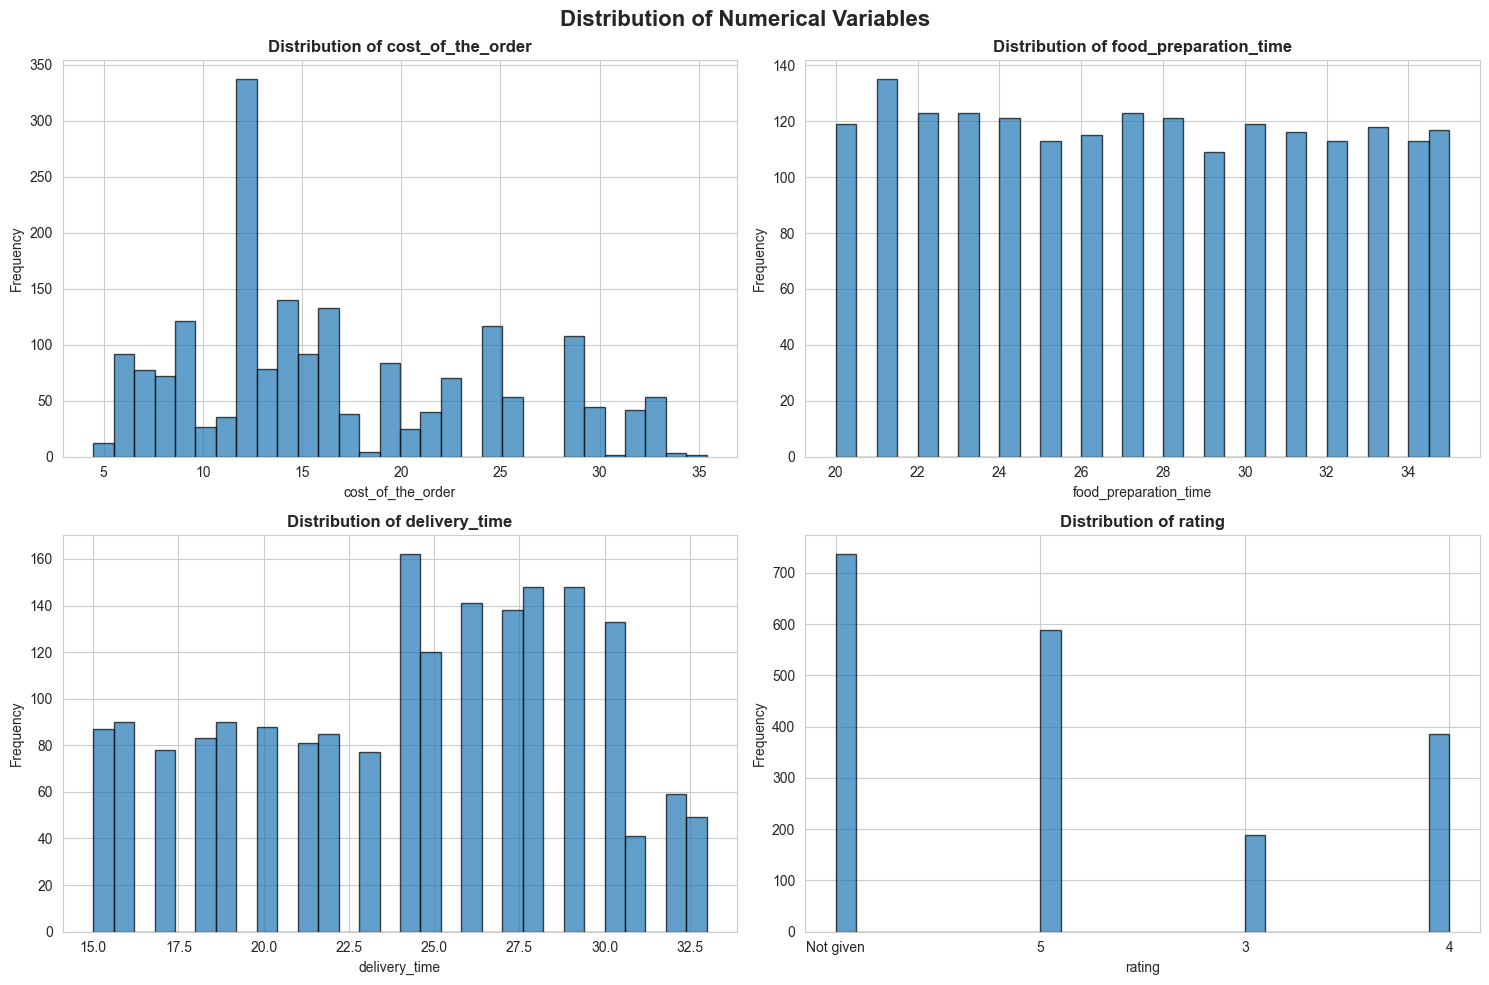

In [16]:
# Graphs of distribution of numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')

numeric_cols = df_numerical.select_dtypes(include=[np.number]).columns[:4]  # First 4 numerical columns
for idx, col in enumerate(numeric_cols):
    ax = axes[idx // 2, idx % 2]
    df[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

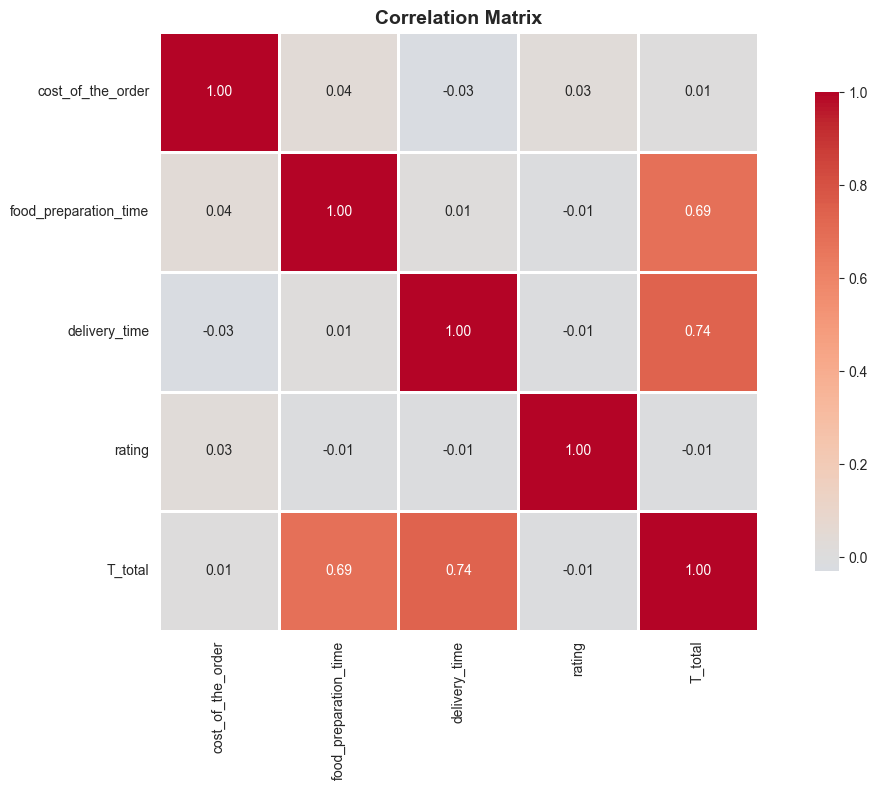

In [17]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df_numerical.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

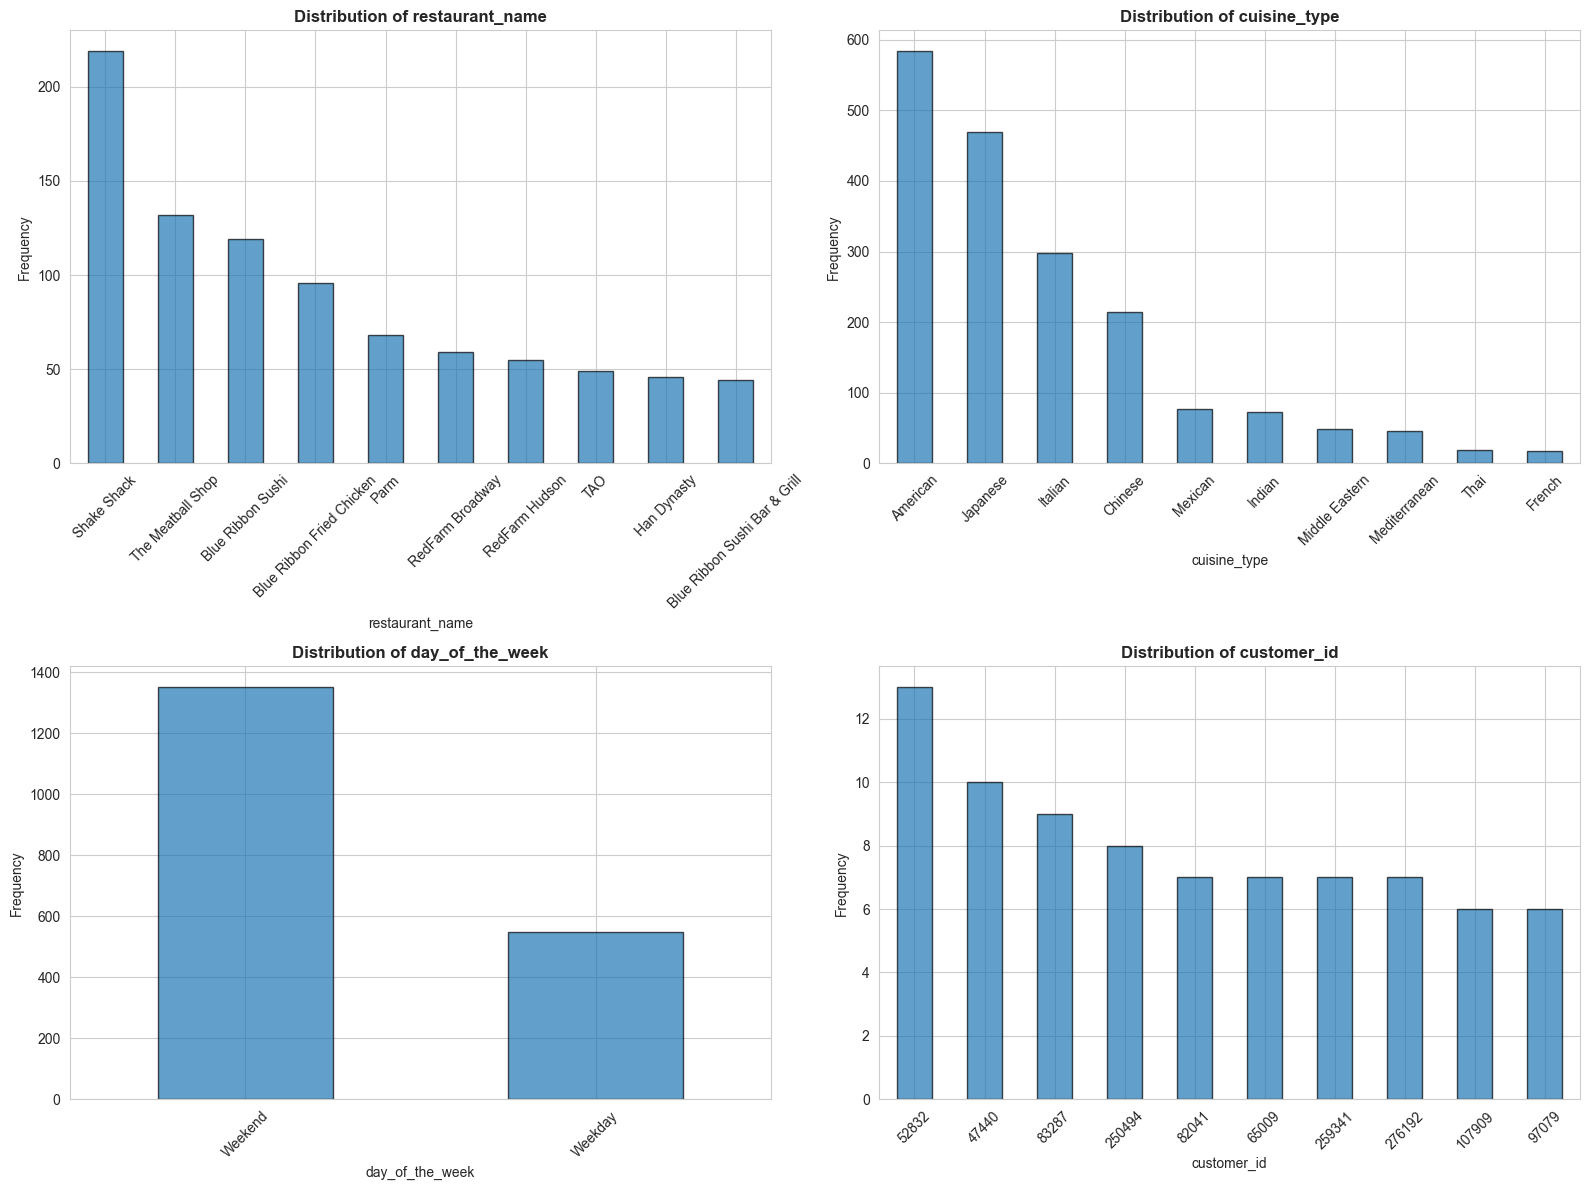

In [18]:
# Bar charts for categorical variables
categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'customer_id']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Convert to 1D array to iterate correctly

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        df[col].value_counts().head(10).plot(kind='bar', ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_xlabel(col)
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Findings and Business Explanations

### 7.1 Executive Summary
Main findings from the analysis:
- The only pattern found within the data we consulted is that in most cases people prefer to place orders through this application on weekends.
- Anomalies detected:
  1. We detected many outliers, specifically we found many restaurants that only had one order.
  2. Additionally, we found small differences between names which we mentioned earlier, which gave us the idea of performing data normalization through a vectorization process.
  3. On the other hand, we found many orders that lacked an established rating, which is a problem for finding real patterns but gives us the opportunity to thoroughly investigate why in many cases people do not leave ratings within this type of application.

- Business opportunities:
Based on the data extracted and reviewed, deeper analysis can be conducted which can help us solve questions, for example:
  1. What can affect the customer rating more? Preparation time or delivery time?
  2. After how many minutes of preparation and delivery does the rating start to drop?
  3. What type of food takes the most time to prepare?
  4. Are customers more tolerant with time when the cost is low?
  5. What restaurants generate high income but low satisfaction?
  6. What type of cuisine generates more complaints?
  7. Do regular customers always order the same food? Or can we identify their tastes and generate recommendations of some kind?

Based on the analysis of these results, this type of business can benefit from improving the restaurants it allows to enter the application, which in the long term can create better reputation for the application and likewise increase its revenue.

### 7.2 Business Recommendations
- Improve the amount of reviews left in the application. With more data it is possible to answer questions and find patterns thanks to the data.
- When storing data it would be beneficial to create an identifier or ID for restaurants, so that there is no problem when performing analysis.
- It would be beneficial to give sporadic discounts to users who use the most and place orders within the application, in order to improve their loyalty to the business.
- Give greater visibility to small businesses through advertising and discounts.

### 7.3 Limitations and Next Steps
- Limitations of the analysis: 40% of data lacks rating information
- Suggested next steps: Implement a rating reminder system
- Additional data required: User demographic information, restaurant location data

## 8. Data Science Methodology Applied

This analysis follows the **CRISP-DM** methodology (Cross-Industry Standard Process for Data Mining):

1. **Business Understanding**: Identify objectives and requirements
2. **Data Understanding**: Collect and explore data
3. **Data Preparation**: Clean and transform data
4. **Modeling**: Apply analysis techniques
5. **Evaluation**: Interpret results
6. **Deployment**: Implement solutions

---

**Date of Completion**: January 30, 2026  
**Tools Used**: Python, Pandas, NumPy, Matplotlib, Seaborn